In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [6]:
dataset = pd.read_csv("Copy of advertising_sales_data.csv")
dataset.head()

,Campaign,TV,Radio,Newspaper,Sales
0,camp1,230.1,37.8,69.2,22.1
1,camp2,44.5,39.3,45.1,10.4
2,camp3,17.2,45.9,69.3,12.0
3,camp4,151.5,41.3,58.5,16.5
4,camp5,180.8,10.8,58.4,17.9


In [7]:
dataset["TV"].mean()

147.0425

# Ans1. The average amount spent on TV advertising is $147.0425.

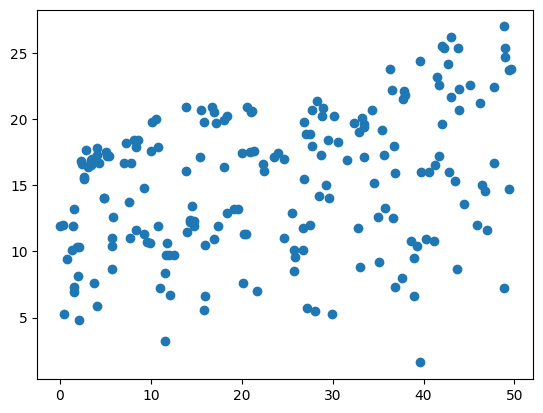

In [8]:
newdf = dataset.dropna()
plt.scatter(dataset.Radio, dataset.Sales)

# Ans2. We can clearly see that this graph is of high entropy and we are not able to see any linear or other dependence between these two attributes - Radio and Product Sales. So, there is no correlation here.

In [9]:
Radio_median = dataset.Radio.median()
Radio_median

22.4

In [10]:
dataset.Radio = dataset.Radio.fillna(Radio_median)


In [11]:
from sklearn.model_selection import train_test_split
x= dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [12]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [13]:
regressor.intercept_

4.638558258620705

In [14]:
regressor.coef_

array([ 0.0550836 ,  0.10317518, -0.00097381])

# Ans3. According to the theory of Linear Regression model, we can assume the sales column as "y" and a 2-dimensional array consisting of the three advertising platforms as x, consisting of [x1,x2,x3].
# The equation becomes y = m1*x1 + m2*x2 + m3*x3 , where m1,m2,m3 are the coefficients which tell the dependence of y on an attribute.
# The coefficients of our linear regression model are 0.0550836 for TV, 0.10317518 for Radio and -0.00097381 for Newspaper.** We can see that Radio advertising has the highest impact on sales amongst the three.**

In [15]:
y_actual = y_test
y_predicted = regressor.predict(x_test)

Text(0.5, 1.0, 'Actual Sales vs Predicted Sales')

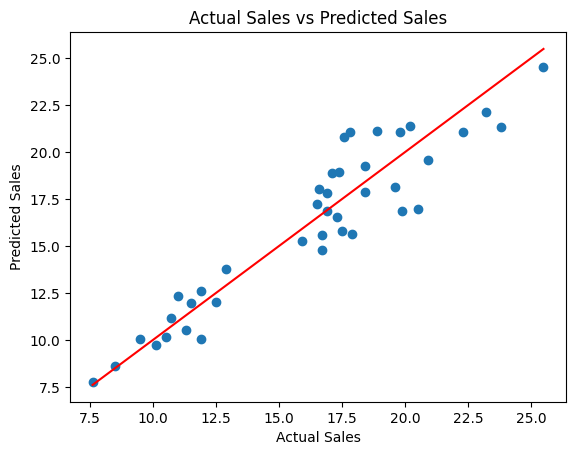

In [16]:
%matplotlib inline
x_ref = [y_actual.min(),y_actual.max()]
y_ref = [y_actual.min(),y_actual.max()]
plt.plot(x_ref,y_ref,color="red")
plt.scatter(y_actual,y_predicted)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual Sales vs Predicted Sales")


In [17]:
regressor.score(x_test,y_test)

0.8747379983699565

## Ans4. We visualized the predicted sales vs actual sales on our test dataset and above is the plot to clearly understand it. The predicted and actual sale values match by **87.47379983699565 %.**

In [18]:
regressor.predict([[200,40,50]])

array([19.73359364])

# Ans5. The predicted sales for a new set of advertising expenditures: 200 on TV, 40 on Radio, and 50 on Newspaper are **19.73359364**.

# **NORMALIZING THE DATASET**

In [19]:
scaled_dataset = dataset.iloc[:,1:]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [20]:
from sklearn.linear_model import LinearRegression
nregressor = LinearRegression()
nregressor.fit(x_train_scaled,y_train)


LinearRegression()

In [21]:
nregressor.score(x_test_scaled,y_test)

0.8747379983699565

In [25]:
y_actual = y_test
y_predicted = nregressor.predict(x_test_scaled)

Text(0.5, 1.0, 'Actual Sales vs Predicted Sales')

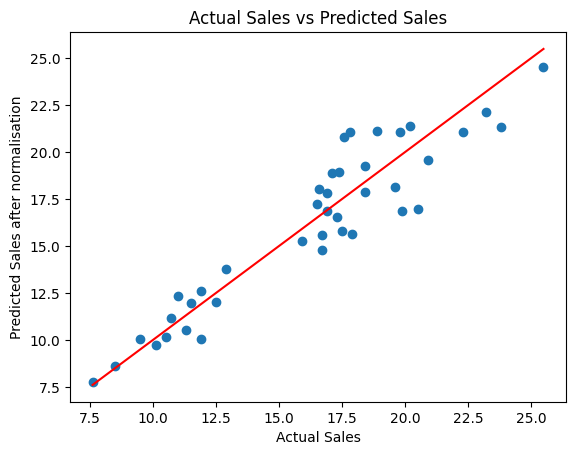

In [27]:
%matplotlib inline
x_ref = [y_actual.min(),y_actual.max()]
y_ref = [y_actual.min(),y_actual.max()]
plt.plot(x_ref,y_ref,color="red")
plt.scatter(y_actual,y_predicted)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales after normalisation")
plt.title("Actual Sales vs Predicted Sales")

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_predicted)
print("Mean Squared Error:", mse)

# Calculate R-squared
r2 = r2_score(y_test, y_predicted)
print("R-squared:", r2)


Mean Squared Error: 2.409038032461486
R-squared: 0.8747379983699565


# Ans6. The performance of linear regression model is inherently scale invariant. The model coefficients will change to account for the scaling, but the overall fit and predictions will be identical.

## **ANOTHER MODEL WITH ONLY RADIO AND NEWSPAPER AS PREDICTORS**

In [22]:
 xx = dataset.iloc[:,2:-1].values
 yy = dataset.iloc[:,-1].values
 xx_train,xx_test,yy_train,yy_test=train_test_split(xx,yy,test_size=0.2,random_state=1)
 regressor2 = LinearRegression()
 regressor2.fit(xx_train,yy_train)

LinearRegression()

In [23]:
regressor2.score(xx_train,yy_train)

0.1273313601259144

In [24]:
regressor2.coef_

array([0.12065595, 0.01089603])

# Ans7. The score of our prediction model became significantly low after removing the TV predictor attribute. This means that it is highly correlated with the other attributes(multicollinearity). If it is removed, the other two attributes cannot compensate for the loss of information which results in the poor performance of the prediction model.